# Question 4

* Intensity transformation that should be applied is f (x) = min(x + (a/128) * e(−(x−128)*2)/2σ**2) , 255).
* It should be applied only to the saturation plane.

In [42]:
#Importing the necessary libraries 

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Part (a)

In [15]:
# Load the image
image = cv.imread('W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Images/emma.jpg', cv.IMREAD_COLOR)

# Convert the image to the HSV color space
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the image into hue, saturation, and value planes
hue_plane = hsv_image[:,:,0]
saturation_plane = hsv_image[:,:,1]
value_plane = hsv_image[:,:,2]

#Displaying the Planes for Reference
print('Hue plane is : ',hue_plane)
print('Saturation plane is : ',saturation_plane)
print('Value plane is : ',value_plane)


Hue plane is :  [[133 133 133 ... 120 120 120]
 [133 133 133 ... 120 120 120]
 [133 133 133 ... 120 120 120]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Saturation plane is :  [[15 15 15 ...  6  6  6]
 [15 15 15 ...  6  6  6]
 [15 15 15 ...  6  6  6]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Value plane is :  [[116 116 116 ...  79  79  79]
 [116 116 116 ...  79  79  79]
 [116 116 116 ...  79  79  79]
 ...
 [ 83  79  72 ...   0   0   0]
 [ 67  58  45 ...   0   0   0]
 [ 40  31  18 ...   0   0   0]]


## Part(b)

In [54]:
# Intensity transformation function
def intensity_transformation(x, a, sigma):
    return np.minimum(x + (a / 128) * np.exp(-(x - 128)**2 / (2 * sigma**2)), 255)

# Parameters
a = 1000
sigma = 70

# Apply the intensity transformation to the saturation plane
enhanced_saturation_plane = intensity_transformation(saturation_plane, a, sigma).astype(np.uint8)

# Displaying the enhanced saturation plane
print('Enhanced Saturation Plane is : ',enhanced_saturation_plane)


Enhanced Saturation Plane is :  [[22 22 22 ... 13 13 13]
 [22 22 22 ... 13 13 13]
 [22 22 22 ... 13 13 13]
 ...
 [ 7  7  7 ...  7  7  7]
 [ 7  7  7 ...  7  7  7]
 [ 7  7  7 ...  7  7  7]]


## Part(c)

In [55]:
# Create the enhanced HSV image
enhanced_hsv_image = np.stack([hue_plane, enhanced_saturation_plane, value_plane], axis=-1)

# Convert the enhanced HSV image back to the BGR color space
enhanced_bgr_image = cv.cvtColor(enhanced_hsv_image, cv.COLOR_HSV2BGR)


## Part(d)

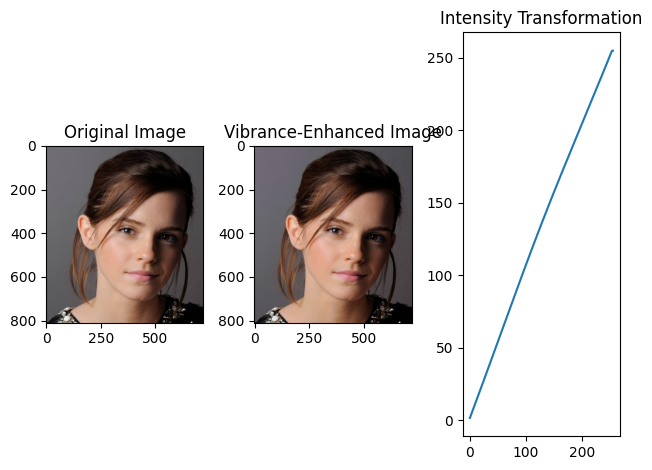

In [56]:
# Display the images

plt.subplot(1, 3, 1)

# Converting to RGB space for displaying
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(enhanced_bgr_image, cv.COLOR_BGR2RGB))
plt.title("Vibrance-Enhanced Image")

plt.subplot(1, 3, 3)
x_vals = np.arange(0, 256)
intensity_vals = intensity_transformation(x_vals, a, sigma)
plt.plot(x_vals, intensity_vals)
plt.title("Intensity Transformation")

plt.tight_layout()
plt.show()
